# info

##### ❏ カラム一覧
- 質的変数
    - pclass	int	客室のクラス（1,2,3の順に高級クラス）
    - sex	char	性別
    - embarked	char	乗船した港（S=Southampton, C=Cherbourg, Q=Queenstown）
- 量的変数
    - survived	boolean	生還結果（1=生還, 0=死亡）
    - age	int	年齢
    - sibsp	int	乗船していた兄弟、配偶者の数
    - parch	int	乗船していた両親、子供の数
    - fare	float	運賃

##### ❏ チェックポイント
1. 欠損値有無の確認がなされている
1. 各質的変数の水準数を数値で確認している
1. 各質的変数の度数分布を確認している
1. 各量的変数のzero割合を確認している
1. 各量的変数のヒストグラムを確認している

# init

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
plt.style.use('seaborn')

In [27]:
def config_plot(h=10):
    plt.rcParams["font.size"] = 1.5*h
    return (1.62*h, h)

# load

In [28]:
path_doc = "../doc/"
path_img = path_doc + "img/"

In [2]:
path_data = "../data/"
path_raw = path_data + "raw/"
path_mid = path_data + "mid/"

In [5]:
train = pd.read_csv(path_raw+"train.tsv", sep="\t", index_col="id")

In [6]:
test = pd.read_csv(path_raw+"test.tsv", sep="\t", index_col="id")

In [8]:
union = pd.concat([train, test], sort=True)

# check

In [12]:
union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 3 to 890
Data columns (total 8 columns):
age         714 non-null float64
embarked    889 non-null object
fare        891 non-null float64
parch       891 non-null int64
pclass      891 non-null int64
sex         891 non-null object
sibsp       891 non-null int64
survived    445 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 102.6+ KB


##### チェックポイント1: 欠損値有無の確認がなされている
- 次の変数に欠損値が存在する。
    - age
    - embarked
- 対応
    - age: 欠損値が2割程度と多いので、他の変数の傾向から補完する。<br>-> ageの欠損に意味がありそうならば特徴量作成。
    - embarked: 欠損値が2件と少ないので、最頻値で埋める。

In [10]:
union.T

id,3,4,7,9,11,13,16,19,23,24,...,878,880,881,882,883,885,886,887,889,890
age,35,35,2,14,58,39,2,NaN,28,8,...,NaN,25,33,22,28,39,27,19,26,32
embarked,S,S,S,C,S,S,Q,C,S,S,...,S,S,S,S,S,Q,S,S,C,Q
fare,53.1,8.05,21.075,30.0708,26.55,31.275,29.125,7.225,35.5,21.075,...,7.8958,26,7.8958,10.5167,10.5,29.125,13,30,30,7.75
parch,0,0,1,0,0,5,1,0,0,1,...,0,1,0,0,0,5,0,0,0,0
pclass,1,3,3,2,1,3,3,3,1,3,...,3,2,3,3,2,3,2,1,1,3
sex,female,male,male,female,female,male,male,female,male,female,...,male,female,male,female,male,female,male,female,male,male
sibsp,1,0,3,1,0,1,4,0,0,3,...,0,0,0,0,0,0,0,0,0,0
survived,1,0,0,1,1,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# clns

In [17]:
# pclassを文字列に変換
union["pclass"] = union["pclass"].replace([1,2,3], ["1st","2nd","3rd"])

In [20]:
union.dtypes

age         float64
embarked     object
fare        float64
parch         int64
pclass       object
sex          object
sibsp         int64
survived    float64
dtype: object

In [23]:
cats = union.select_dtypes("object")
nums = union.drop(cats, 1)

In [25]:
cats.T

id,3,4,7,9,11,13,16,19,23,24,...,878,880,881,882,883,885,886,887,889,890
embarked,S,S,S,C,S,S,Q,C,S,S,...,S,S,S,S,S,Q,S,S,C,Q
pclass,1st,3rd,3rd,2nd,1st,3rd,3rd,3rd,1st,3rd,...,3rd,2nd,3rd,3rd,2nd,3rd,2nd,1st,1st,3rd
sex,female,male,male,female,female,male,male,female,male,female,...,male,female,male,female,male,female,male,female,male,male


In [26]:
nums.T

id,3,4,7,9,11,13,16,19,23,24,...,878,880,881,882,883,885,886,887,889,890
age,35.0,35.00,2.000,14.0000,58.00,39.000,2.000,NaN,28.0,8.000,...,NaN,25.0,33.0000,22.0000,28.0,39.000,27.0,19.0,26.0,32.00
fare,53.1,8.05,21.075,30.0708,26.55,31.275,29.125,7.225,35.5,21.075,...,7.8958,26.0,7.8958,10.5167,10.5,29.125,13.0,30.0,30.0,7.75
parch,0.0,0.00,1.000,0.0000,0.00,5.000,1.000,0.000,0.0,1.000,...,0.0000,1.0,0.0000,0.0000,0.0,5.000,0.0,0.0,0.0,0.00
sibsp,1.0,0.00,3.000,1.0000,0.00,1.000,4.000,0.000,0.0,3.000,...,0.0000,0.0,0.0000,0.0000,0.0,0.000,0.0,0.0,0.0,0.00
survived,1.0,0.00,0.000,1.0000,1.00,0.000,0.000,1.000,1.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# viz

##### cat

In [81]:
def plot_cat(cats, tgt):
    # setting
    plt.figure(figsize=config_plot())
    
    # freq -> plot
    cname = "freq"
    freq = cats.groupby(tgt).size()
    freq.name = cname
    plt.bar(x=freq.index, height=freq)
    plt.ylabel(cname)
    plt.ylim(ymax=cats.shape[0])
    plt.title(tgt + " levels = %s"%freq.shape[0], fontsize=20)
    
    # text plot
    for i, v in enumerate(freq.values):
        plt.text(x=i-0.05, y=v+10, s=v, fontsize=20)
    
    # save&show
    plt.savefig(path_img+"uni_cat_"+tgt+".png")
    plt.show()

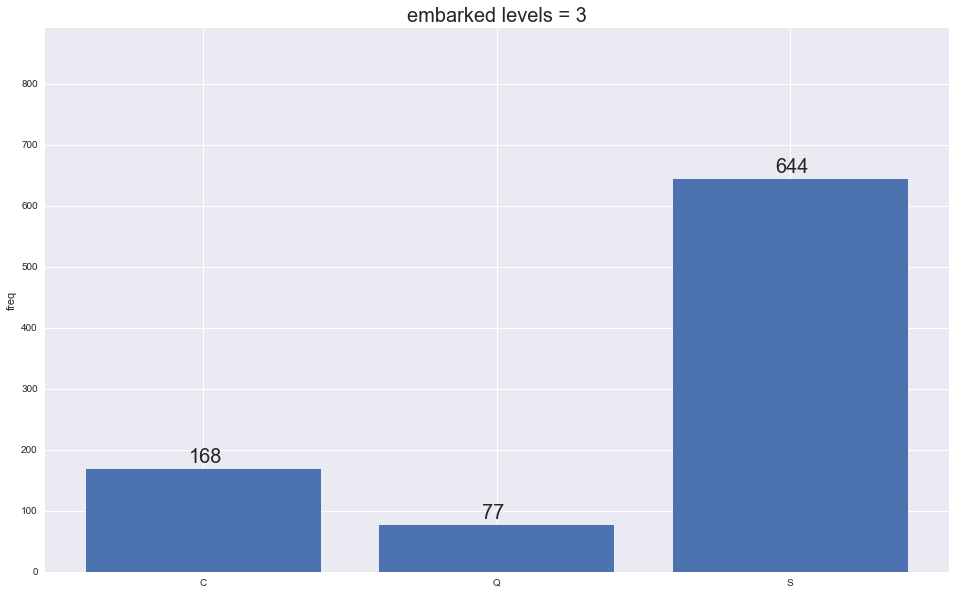

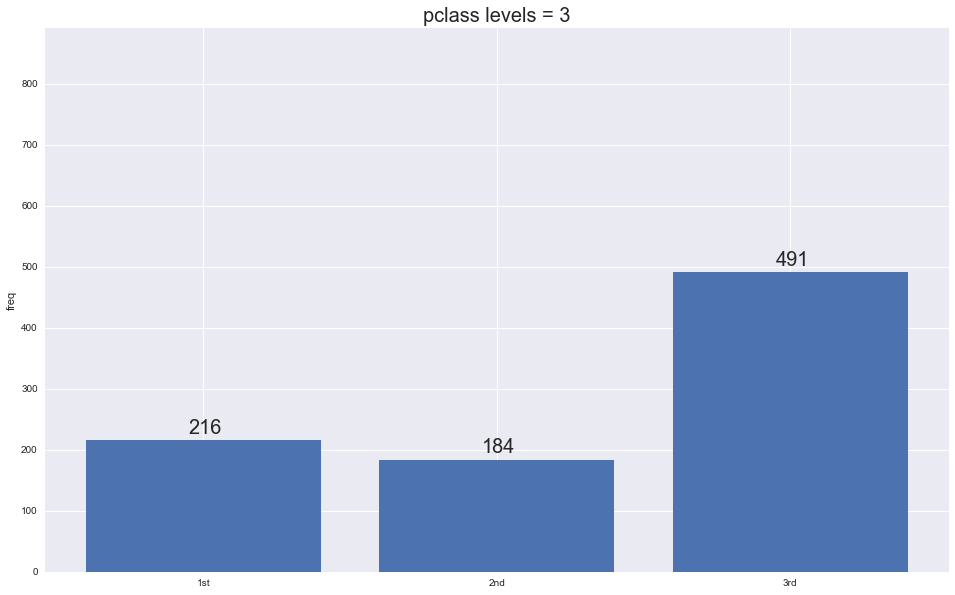

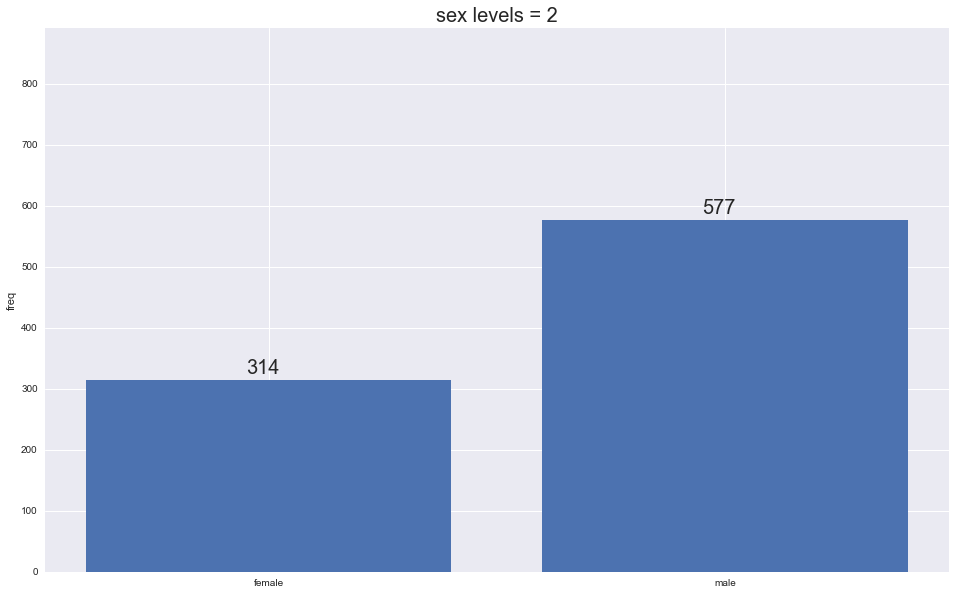

In [82]:
for tgt in cats:
    plot_cat(cats, tgt)

##### チェックポイント2: 各質的変数の水準数を数値で確認している
- 水準数が無駄に大きい変数は特に存在しない。

##### チェックポイント3: 各質的変数の度数分布を確認している
- embarkedは`S`が最頻値なので、欠損値は`S`で埋める。

##### num

In [84]:
tgt = "age"

C:\Users\keisu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


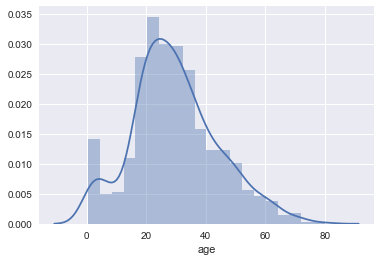

In [95]:
def plot_num(nums, tgt):
    # setting
    plt.figure(figsize=config_plot())
    
    # freq -> plot
    zero_rate = (nums[tgt].dropna() == 0).mean()
    fig = sns.distplot(nums[tgt].dropna())
    fig.set_title(tgt + " ZeroRate = %s"%zero_rate.round(3), fontsize=20)
    
    # save&show
    plt.savefig(path_img+"uni_num_"+tgt+".png")
    plt.show()

C:\Users\keisu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


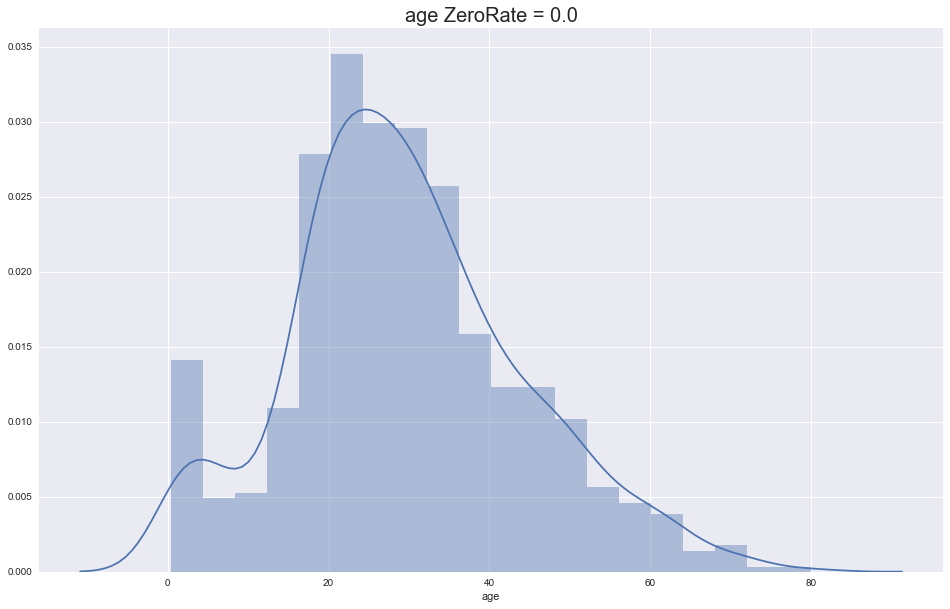

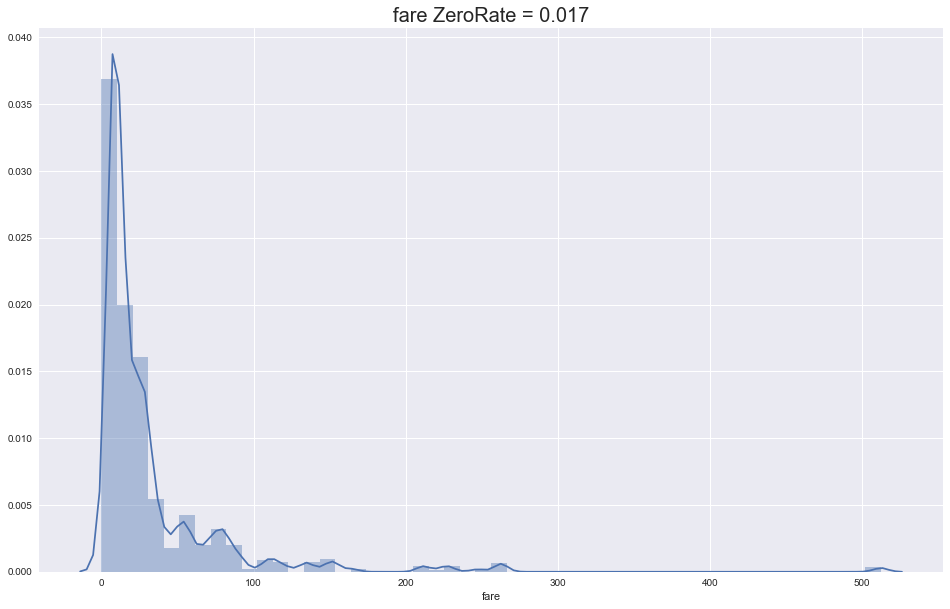

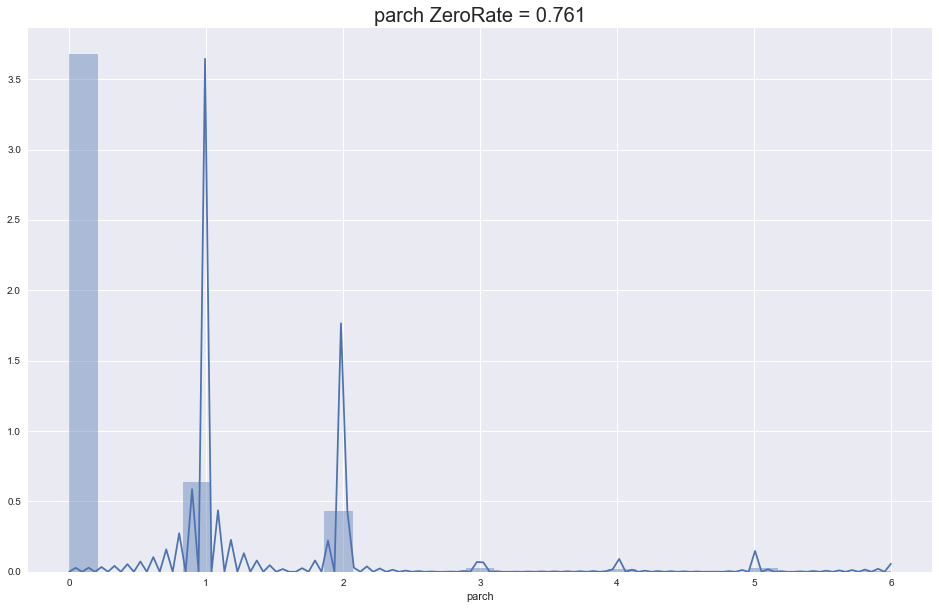

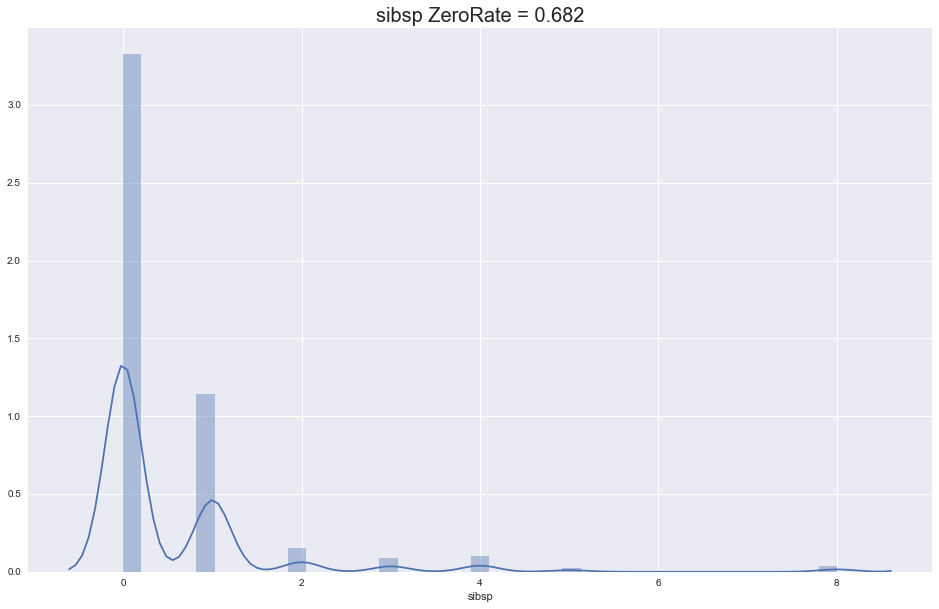

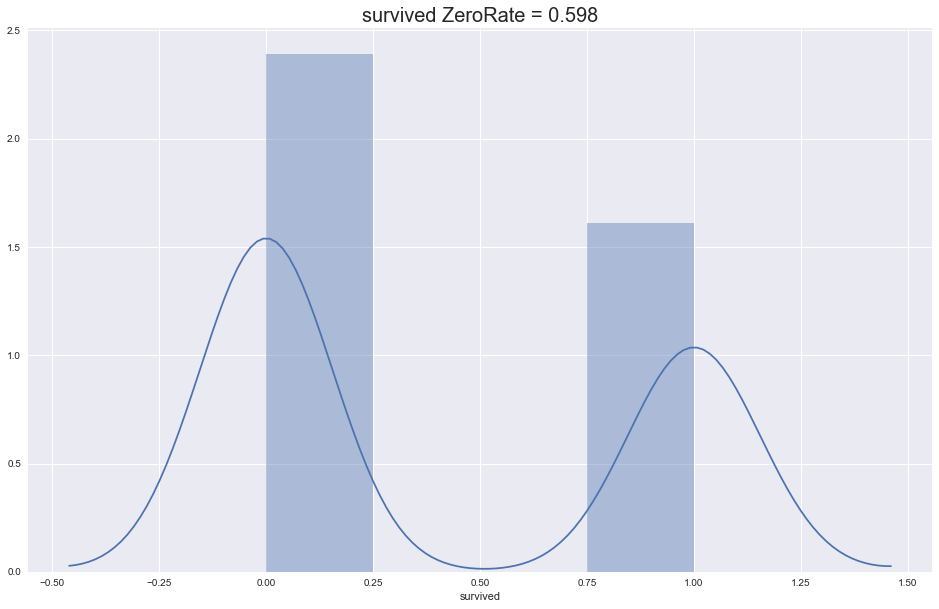

In [96]:
for tgt in nums:
    plot_num(nums, tgt)

##### チェックポイント4: 各量的変数のzero割合を確認している
- 次の変数にzeroが存在
    - fare: zeroは不可解なので、どのような人物なのかを確認してみる。
    - parch, sibsp: zero割合が過半数であるため、量的変数としての使用は情報が少ないので、質的変数として使用することを検討する。

##### チェックポイント5: 各量的変数のヒストグラムを確認している
- age, fareは対数変換が有効であるかを確認する必要がある。（parch, sibspは実態として離散値なので対数変換はしない）

# check v2

In [99]:
# age欠損行の特徴確認
union["isna_age"] = union.age.isna()
union.groupby("isna_age").mean()

,age,fare,parch,sibsp,survived
isna_age,,,,,
False,29.699118,34.694514,0.431373,0.512605,0.427778
True,NaN,22.158567,0.180791,0.564972,0.294118


- ageの欠損行は次のような特徴がある。
    - 生存率が低い（有意であることはほぼ自明）
    - parchが少ない
- 仮説として、(家族が同乗していない or 家族が全員亡くなった) and 亡くなった という方が多いか。

In [101]:
# age欠損行の特徴確認
union["iszero_parch"] = union.parch == 0
union.groupby(["isna_age", "iszero_parch"]).agg(["mean", "size"])

age            fare          parch       \
                            mean size       mean size      mean size   
isna_age iszero_parch                                                  
False    False         23.006062  193  54.701016  193  1.595855  193   
         True          32.178503  521  27.283276  521  0.000000  521   
True     False               NaN   20  39.441040   20  1.600000   20   
         True                NaN  157  19.956978  157  0.000000  157   

                          sibsp       survived       
                           mean size      mean size  
isna_age iszero_parch                                
False    False         1.202073  193  0.568627  193  
         True          0.257198  521  0.372093  521  
True     False         3.650000   20  0.230769   20  
         True          0.171975  157  0.305556  157

In [102]:
# fare == 0 行の確認
union[union.fare==0]

,age,embarked,fare,parch,pclass,sex,sibsp,survived,isna_age,iszero_parch
id,,,,,,,,,,
277,NaN,S,0.0,0,2nd,male,0,0.0,True,True
466,NaN,S,0.0,0,2nd,male,0,0.0,True,True
633,NaN,S,0.0,0,1st,male,0,0.0,True,True
732,NaN,S,0.0,0,2nd,male,0,0.0,True,True
179,36.0,S,0.0,0,3rd,male,0,NaN,False,True
263,40.0,S,0.0,0,1st,male,0,NaN,False,True
271,25.0,S,0.0,0,3rd,male,0,NaN,False,True
302,19.0,S,0.0,0,3rd,male,0,NaN,False,True
413,NaN,S,0.0,0,2nd,male,0,NaN,True,True


- 対象行に共通する特徴は以下。
    - 港がS
    - 家族が0
    - 全員 男性
    - train内では全員死亡
- 過学習する可能性はあるが、なにかしらの一行と考えて、全員死亡したと推測するという戦略も考えられる。

In [103]:
union["iszero_fare"] = union.fare == 0

In [107]:
bools = union.select_dtypes("bool")
bools = bools.drop("iszero_parch",1)

# write

In [109]:
cats.to_csv(path_mid+"cats.csv")
nums.to_csv(path_mid+"nums.csv")
bools.to_csv(path_mid+"bools.csv")